In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

## Выборка размера 100 из $Cauchy(0, 1)$

In [2]:
N = 100
sample = sts.cauchy.rvs(loc=0, scale=1, size=N)

В качестве априорного распределения для оценки $\theta$, считая что выборка имеет распределение $N(\theta, 1)$, возьмем $N(a, \sigma^{2})$. Параметры равны $(0, 1/16)$, так как именно при таких параметрах $P(|t|\leq0.5) = 0.95$ (правило $2\sigma$).

## График байесовкой оценки параметра $\theta$ и ОМП

In [3]:
def bayesian_estimation(sample, a, sigma_2):
    conditional_expectation = (np.sum(sample) + float(a)/sigma_2)/(sample.size + 1./sigma_2)
    return conditional_expectation

In [4]:
def omp_func(sample):
    return np.mean(sample)

In [5]:
def values_of_estimations(sample, option):
    omp = np.zeros_like(sample)
    bayesian_ests = np.zeros_like(sample)
    for j in xrange(sample.size):
        omp[j] = omp_func(sample[:j+1])
        bayesian_ests[j] = bayesian_estimation(sample[:j+1], option[0], option[1])

    return omp, bayesian_ests

In [6]:
def plot_graphics(sample, option, p, ylim):    
    plt.figure(figsize=(14, 7))
    
    n = np.arange(sample.size)
    omp, bayesian_ests = values_of_estimations(sample, option)
        
    plt.plot(n, np.abs(omp - p*np.ones_like(omp)), label = 'OMP')
    plt.plot(n, np.abs(bayesian_ests - p*np.ones_like(bayesian_ests)), \
                 label = '$(' + str(option[0]) + ', ' + str(option[1]) + ')$')

    plt.ylim(0, ylim)
    plt.ylabel('Estimation')
    plt.xlabel('$n$')
    plt.title('Estimations for $Cauchy(0,1)$')
    plt.legend()

    plt.show()

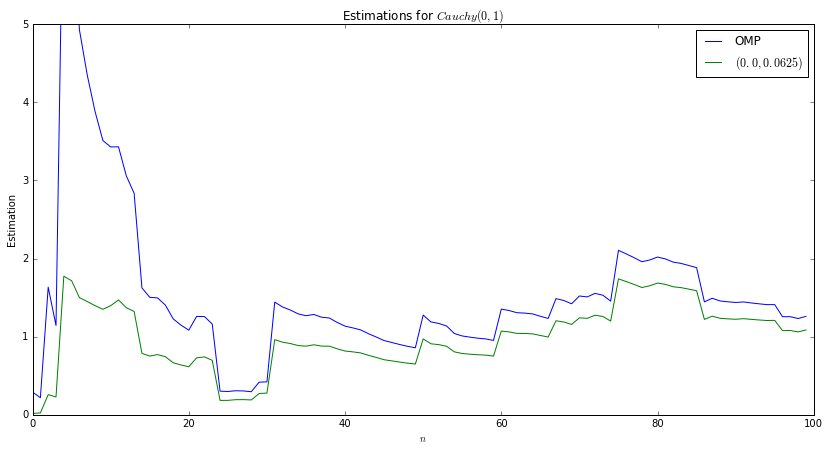

In [7]:
plot_graphics(sample, np.array([0, 1./16]), np.array([0]), 5)

## Вывод

Так как наша модель не совпадает с действительной природой выборки, то и байесовская оценка получается некоректной.

## Выборка размера 100 из $N(0, 1)$

На всякий случай

In [8]:
N = 100
sample = sts.norm.rvs(loc=0, scale=1, size=N)

В качестве априорного распределения для оценки $\theta$, считая что выборка имеет распределение $N(\theta, 1)$, возьмем $N(a, \sigma^{2})$. Параметры равны $(0, 1/16)$, так как именно при таких параметрах $P(|t|\leq0.5) = 0.95$ (правило $2\sigma$).

## График байесовкой оценки параметра $\theta$ и ОМП

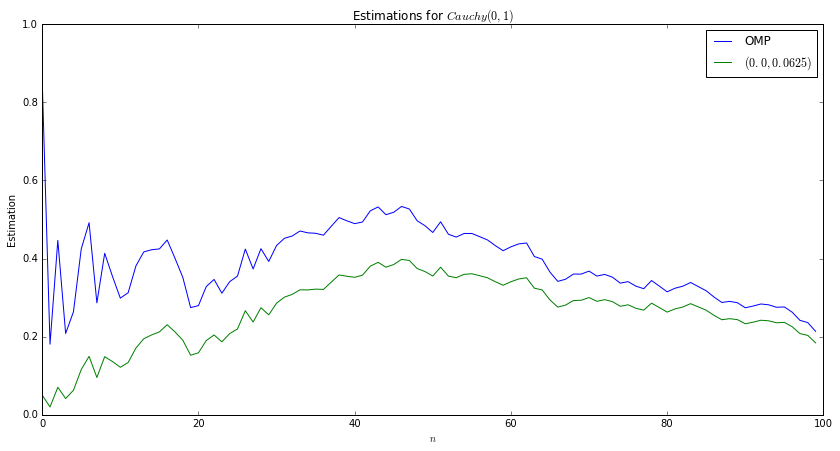

In [9]:
plot_graphics(sample, np.array([0, 1./16]), np.array([0]), 1)

## Вывод

При наличии дополнительных данных байесовская оценка достаточно точна, но все равно не особо точнее ОМП.